DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Analysis Task :-

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup

In [2]:
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
df.shape, type(df)

((2224, 11), pandas.core.frame.DataFrame)

In [7]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [12]:
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])

In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [15]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [17]:
import datetime

In [18]:
df['YYYY-MM']= df['Date'].apply(lambda x: datetime.datetime.strftime(x,'%Y %m')) # Extract month from date

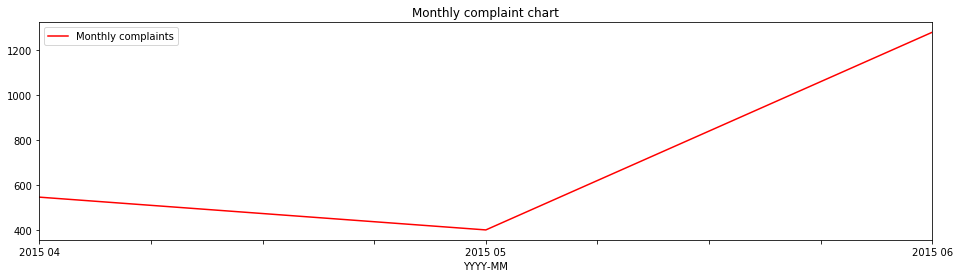

In [50]:
plt.figure(figsize=(16,4))
monthly_comp=df.groupby('YYYY-MM').size()
monthly_comp.plot (color='red',title='Monthly complaint chart',label='Monthly complaints',legend=True)
plt.show()

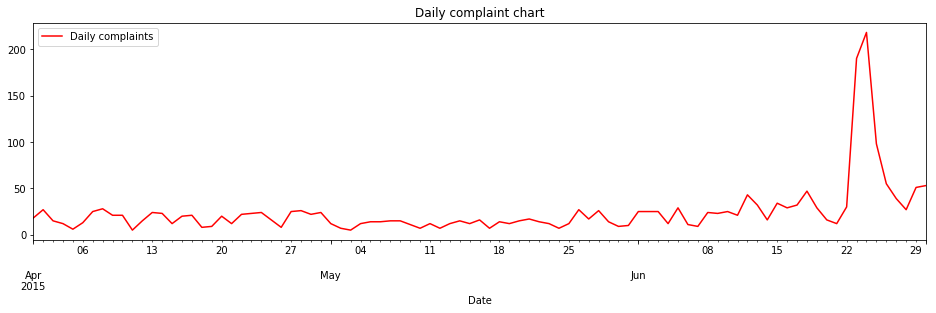

In [49]:
plt.figure(figsize=(16,4))
daily_comp=df.groupby('Date').size()
daily_comp.plot (color='red',title='Daily complaint chart',label='Daily complaints',legend=True)
plt.show()

### Provide a table with the frequency of complaint types.
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

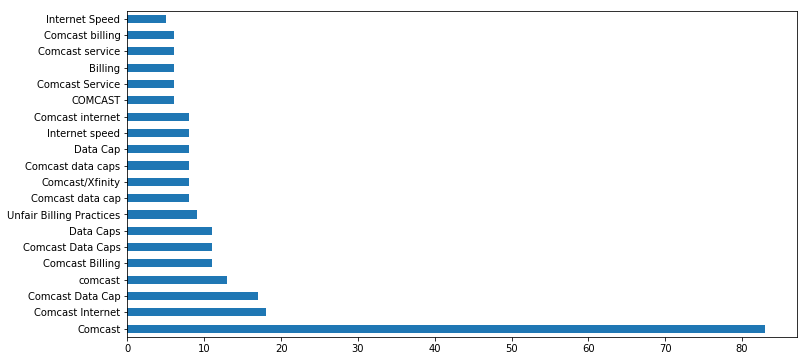

In [63]:
comp_freq= df['Customer Complaint'].value_counts()
plt.figure(figsize=(12,6))
comp_freq.sort_values(ascending=False)[:20].plot(kind='barh')

In [69]:
plt.figure(figsize=(20,10))
comp_freq_state=df.groupby(['State','Customer Complaint']).size().unstack()
#comp_freq_state[:20].plot(kind='barh',title='Customer compaints by state')

<Figure size 1440x720 with 0 Axes>

In [70]:
comp_freq_state[:3]

Customer Complaint,(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!,10 Days No Service - 12 Appointments Comcast Hasn't Shown Up - Comcast Has Not Fixed Home Infinity X1 - In 10 Days- Cannot Make 911 Calls,2 months and Comcast has not fixed problem,2+ Day Degraded Services,300 GB monthly allowance,300 gb cap,300GB/month Data Cap,300GB/month data cap 'trial' for several years now,60 day delay in cancelling service agreement,60 days to close my account,...,unreliable connection,unresponsive calls to customer service regarding wifi hotspots,unsatisfactory speed with disorganized service,very low wireless speed not working well,very poor customer service,why am I paying for this ?,without service despite willingness to pay,xfinitty tv and exfinity alarm,xfinity Internet,xfinity customer service
State,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


### Create a new categorical variable with value as Open and Closed. 
#Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [71]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,YYYY-MM
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015 04
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015 04
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015 04


In [72]:
df['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [73]:
mapped_status={'Open':'Open',
              'Pending':'Open',
              'Closed':'Closed',
              'Solved':'Closed'}
df['Status'].replace(mapped_status,inplace=True)

In [74]:
df['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

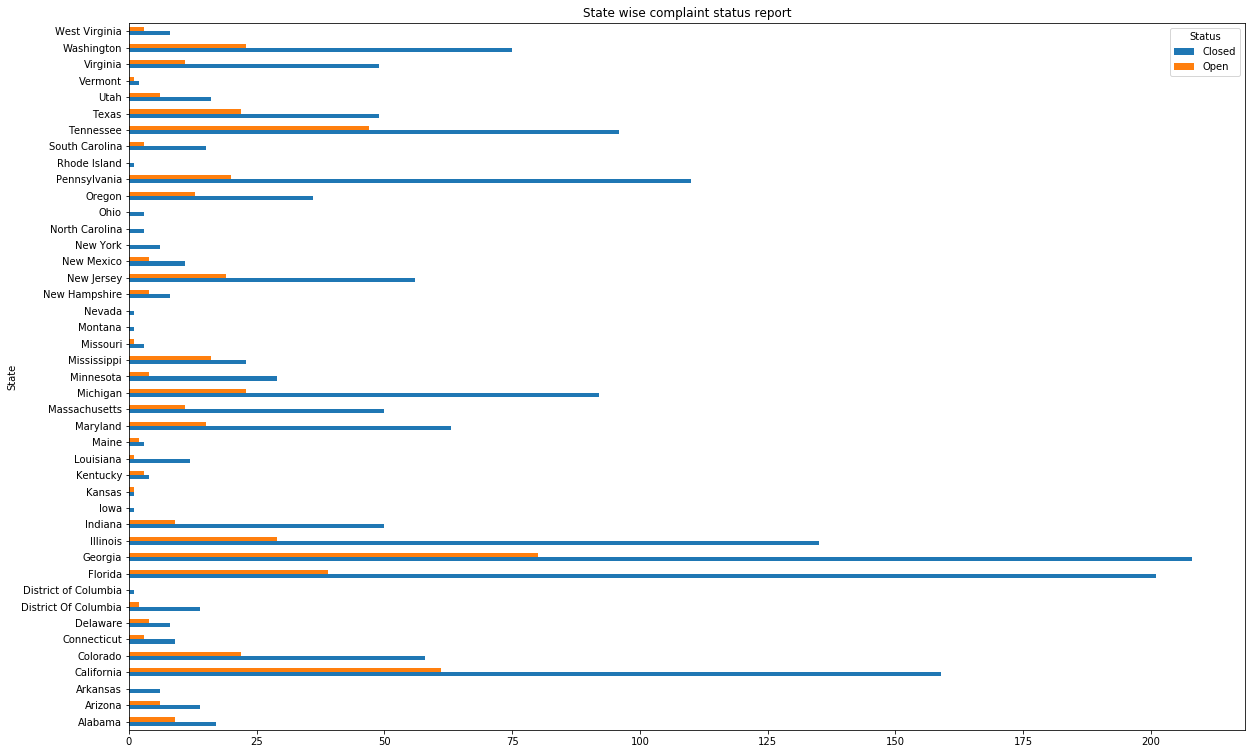

In [81]:
state_wise_comp=df.groupby(['State','Status']).size().unstack()
state_wise_comp.plot(figsize=(20,13),kind='barh',title='State wise complaint status report')

In [88]:
#Which state has the maximum complaints
comp_state=df.groupby(['State']).size()
comp_state.sort_values(ascending=False)[:10]

State
Georgia         288
Florida         240
California      220
Illinois        164
Tennessee       143
Pennsylvania    130
Michigan        115
Washington       98
Colorado         80
Maryland         78
dtype: int64

In [90]:
#Which state has the highest percentage of unresolved complaints
df_unresolved=df[df['Status']=='Open']
df_unresolved.shape

(517, 12)

In [92]:
df_unresolved.groupby('State').size().sort_values(ascending=False)[:10]

State
Georgia         80
California      61
Tennessee       47
Florida         39
Illinois        29
Michigan        23
Washington      23
Colorado        22
Texas           22
Pennsylvania    20
dtype: int64